# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import pi
import sydney_weather_data
import matplotlib

%load_ext autoreload

%autoreload 2


In [77]:
df = sydney_weather_data.load_data()

# Colors

In [195]:
colors = ['#a6cee3', '#1f78b4']
colors = ['#CFB87C', '#565A5C']

colors = ['#7b2cbf', '#3c096c']
colors = ['#832161', '#565A5C']
colors = ['#990d35', '#565A5C']
#colors = ['#3c096c', '#9d4edd']

In [196]:
wind_direct = ['N','NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW',  'WSW', 'W', 'WNW', 'NW', 'NNW']
wind_direct_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W',  'NW']

In [197]:
cardinal_labels = ['N', 'E', 'S', 'W']
df_wind = df.copy()
df_wind = df_wind[['WindDir9am', 'WindDir3pm']].replace(['N', 'NNE', 'NNW'], 'N')
df_wind = df_wind[['WindDir9am', 'WindDir3pm']].replace(['S', 'SSE', 'SSW'], 'S')
df_wind = df_wind[['WindDir9am', 'WindDir3pm']].replace(['W', 'WNW', 'WSW', 'NW', 'SW'], 'W')
df_wind = df_wind[['WindDir9am', 'WindDir3pm']].replace(['E', 'ENE', 'ESE', 'NE', 'SE'], 'E')

df_wind_dir_morning_condenced = df_wind['WindDir9am'].value_counts().reindex(cardinal_labels)
df_wind_dir_afternoon_condenced = df_wind['WindDir3pm'].value_counts().reindex(cardinal_labels)

total = sum(df_wind_dir_morning_condenced)
df_wind_dir_morning_condenced = df_wind_dir_morning_condenced/total
df_wind_dir_afternoon_condenced = df_wind_dir_afternoon_condenced/total

In [198]:
df_wind_dir_morning = df['WindDir9am'].value_counts().reindex(wind_direct)
df_wind_dir_afternoon = df['WindDir3pm'].value_counts().reindex(wind_direct)

total = sum(df_wind_dir_morning)
df_wind_dir_morning = df_wind_dir_morning/total
df_wind_dir_afternoon = df_wind_dir_afternoon/total

In [199]:
def polar_wind_chart(data_list, filename, ax_labels):
    chart_titles = ['Morning Wind Direction', 'Afternoon Wind Direction']


    # Base numbers for the graph
    angle_change = 360/len(data_list[0])
    # Create a list of angles for the direction labels
    angles = np.arange(0,360,360/len(wind_direct_labels))

    #Start in the middle of one of the pie pieces so they appear centered
    startangle =-angle_change/2

    fig, ax = plt.subplots(1, 2, figsize=(10, 6), subplot_kw={'projection':'polar'})
    for j, data in enumerate(data_list):
        # Loop through every segment
        for i, d in enumerate(data):
            x = (angle_change * pi *2)/ 360
            left = (startangle * pi *2)/ 360 
            startangle += angle_change
            ax[j].barh(0, x, left=left, height=d, align='edge', color = colors[j], zorder=3)

        # Set the plot features
        ax[j].spines.clear()
        ax[j].grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=0)
        ax[j].grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
        ax[j].set_theta_offset(.5*pi)
        ax[j].set_theta_direction(-1)
        ax[j].set_thetagrids(angles, labels=wind_direct_labels, fmt=None)
        ax[j].set_title(chart_titles[j])
        ax[j].set_yticks(ax_labels[0], labels = ax_labels[1])


    plt.subplots_adjust(left=None, bottom=0.25, right=None, top=0.81, wspace=None, hspace=None)
    fig.suptitle('Wind Direction in Sydney from February 2008 to June 2017', fontsize=14)
    fig.text(x=0.10, y=0.12, s="Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)
    fig.savefig(f'./images/{filename}', bbox_inches='tight')
    plt.show()

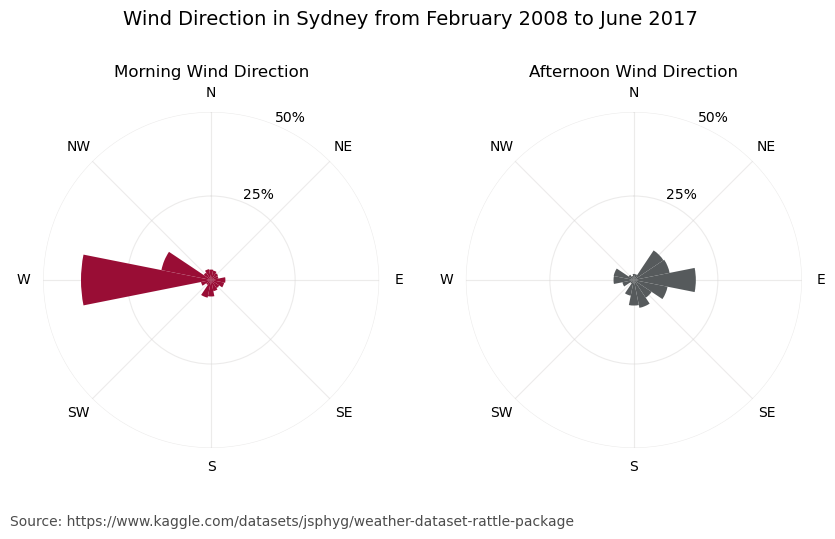

In [200]:
# Wind direction with 16 different directions
#'N','NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW',  'WSW', 'W', 'WNW', 'NW', 'NNW'

polar_wind_chart([df_wind_dir_morning, df_wind_dir_afternoon], 'sydney_wind_direct.svg', [[.25,.5], ['25%','50%']])

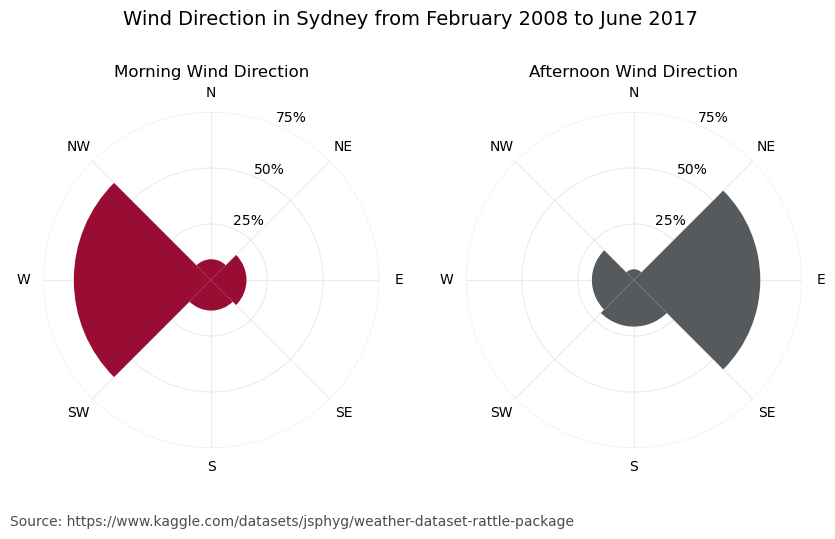

In [201]:
# Wind direction aggreagated into 4 directions
# 'N', 'E', 'S', 'W'

polar_wind_chart([df_wind_dir_morning_condenced, df_wind_dir_afternoon_condenced], 'sydney_wind_direction_condensed.svg', [[.25,.5, .75], ['25%','50%','75%']] )

In [202]:
windspeed_group_season = df.groupby(['season'], as_index=False, observed=True)[['WindSpeed9am', 'WindSpeed3pm']].median().sort_values('season')

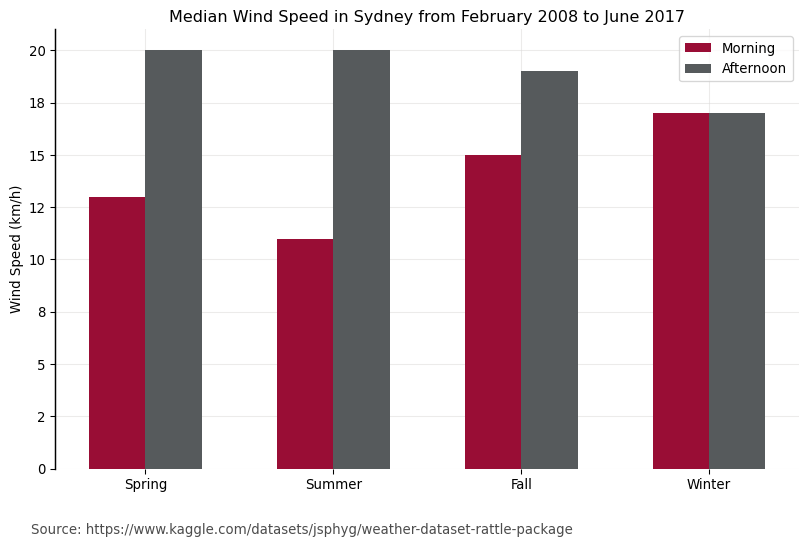

In [205]:
data = windspeed_group_season
x = np.array([1,2,3,4])
bar_width = .3
fig, ax = plt.subplots(figsize=(10,7.5), dpi = 96)
ax.bar(x-bar_width/2, windspeed_group_season['WindSpeed9am'], width=bar_width, align='center', label = 'Morning', color = colors[0], zorder=3)
ax.bar(x+bar_width/2, windspeed_group_season['WindSpeed3pm'], width=bar_width,  align='center', label = 'Afternoon', color = colors[1], zorder=3)
ax.set_xticks(x, labels = windspeed_group_season['season'])
ax.set_title('Median Wind Speed in Sydney from February 2008 to June 2017')
ax.set_ylabel('Wind Speed (km/h)')
ax.text(x=0.10, y=0.15, s="Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=0)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
    # Make the left spine thicker
ax.spines[['top','right','bottom']].set_visible(False)
ax.spines['left'].set_linewidth(1.1)
plt.subplots_adjust(left=None, bottom=0.24, right=None, top=0.85, wspace=None, hspace=None)
plt.legend()
fig.savefig(f'./images/sydney_median_windspeed.svg', bbox_inches='tight')
plt.show()


465 465


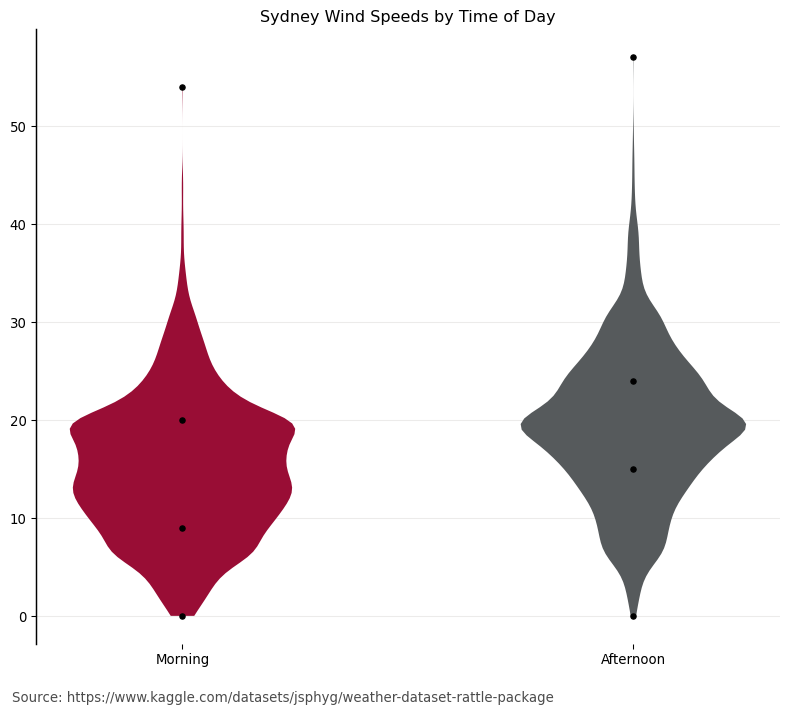

In [204]:
data = df[['WindSpeed9am','WindSpeed3pm']]
min_data, quartile1, medians, quartile3, max_data = np.percentile(data, [0, 25, 50, 75, 100], axis=0)
data_max_9am = data[data['WindSpeed9am'] > quartile3[0]]['WindSpeed9am']
data_max_3pm = data[data['WindSpeed3pm'] > quartile3[1]]['WindSpeed3pm']
max_x_9am = np.full(len(data_max_9am), 1)
max_x_3pm = np.full(1, len(data_max_3pm))
print(len(max_x_9am), len(data_max_9am),)
inds = np.arange(1, len(medians) + 1)

fig, ax = plt.subplots(figsize=(10,10), dpi = 96)
vplot = ax.violinplot(data, showmeans=True, showmedians=True,
        showextrema=False)
for i, pc in enumerate(vplot['bodies']):
    if i == 0:
        pc.set_facecolor(colors[0])
        pc.set_alpha(1)
        pc.set_zorder(3)
        """ ax.scatter(i+1, min_data[i], marker='o', color=colors[1], s=15, zorder=3)
        ax.scatter(i+1, max_data[i], marker='o', color=colors[1], s=15, zorder=3)
        ax.scatter(i+1, quartile1[i], marker='o', color=colors[1], s=15, zorder=3)
        ax.scatter(i+1, quartile3[i], marker='o', color=colors[1], s=15, zorder=3)"""

    else:
        pc.set_facecolor(colors[1])
        pc.set_alpha(1)
        pc.set_zorder(3)
        """ax.scatter(i+1, min_data[i], marker='o', color=colors[0], s=15, zorder=3)
        ax.scatter(i+1, max_data[i], marker='o', color=colors[0], s=15, zorder=3)
        ax.scatter(i+1, quartile1[i], marker='o', color=colors[0], s=15, zorder=3)
        ax.scatter(i+1, quartile3[i], marker='o', color=colors[0], s=15, zorder=3)"""
#vplot['bodies'].set_facecolor('#D43F3A')
ax.spines['left'].set_linewidth(1.1)
ax.spines[['top','right','bottom']].set_visible(False)
ax.set_xticks(inds, labels = ['Morning','Afternoon'])
#ax.scatter(inds, medians, marker='o', color=colors[1], s=30, zorder=3)
ax.scatter(inds, min_data, marker='o', color='black', s=15, zorder=3)
ax.scatter(inds, max_data, marker='o', color='black', s=15, zorder=3)
ax.scatter(inds, quartile1, marker='o', color='black', s=15, zorder=3)
ax.scatter(inds, quartile3, marker='o', color='black', s=15, zorder=3)

plt.subplots_adjust(left=None, bottom=0.21, right=None, top=0.85, wspace=None, hspace=None)
ax.text(x=0.10, y=0.15, s="Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)
ax.set_title('Sydney Wind Speeds by Time of Day')
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
fig.savefig(f'./images/sydney_windspeeds_violin.svg', bbox_inches='tight')
plt.show()